In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from scipy.stats import levy
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler




In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
# Check for missing values
print(df.isnull().sum())
# Remove duplicates
df.drop_duplicates(inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.columns)
# Assuming 'df' is your DataFrame and you want to drop the column named 'customerID'
df.drop(columns=['customerID'], inplace=True)
# If leading or trailing whitespaces are present, remove them
df.columns = df.columns.str.strip()


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
# Assuming df is your DataFrame and "TotalCharges" column contains float numbers

# Convert "TotalCharges" column to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with 0 (or any other suitable value)
df['TotalCharges'].fillna(0, inplace=True)

# Convert float numbers to integers
df['TotalCharges'] = df['TotalCharges'].astype(int)
# Assuming df is your DataFrame and "MonthlyCharges" column contains float numbers

# Convert "MonthlyCharges" column to numeric, coerce errors to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Fill NaN values with 0 (or any other suitable value)
df['MonthlyCharges'].fillna(0, inplace=True)

# Convert float numbers to integers
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)



In [7]:
encoder = LabelEncoder()
# Encoding target variable 'Churn'
y = encoder.fit_transform(df["Churn"])
df.drop(['Churn'], axis=1, inplace=True)  # Drop the "Churn" column from the DataFrame
X = df.copy()
# Encoding categorical variables

X['gender'] = encoder.fit_transform(X['gender'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['InternetService'] = encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = encoder.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = encoder.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = encoder.fit_transform(X['DeviceProtection'])
X['TechSupport'] = encoder.fit_transform(X['TechSupport'])
X['StreamingTV'] = encoder.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = encoder.fit_transform(X['StreamingMovies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['PaperlessBilling'] = encoder.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = encoder.fit_transform(X['PaymentMethod'])
# Print features (X)
print("Features (X):")
print(X.head())

# Print target variable (y)
print("\nTarget Variable (y):")
print(y)

Features (X):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1   

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Testing the model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy * 100, "%")

Accuracy: 0.7352732434350603
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

Accuracy: 73.52732434350602 %


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Preprocessing: Encoding categorical variables
# (You may need to handle missing values and perform other preprocessing steps as necessary)
# Encoding categorical variables
# (Replace this with your actual preprocessing steps)

encoder = LabelEncoder()
# Encoding target variable 'Churn'
y = encoder.fit_transform(df["Churn"])
df.drop(['Churn'], axis=1, inplace=True)  
X = df.copy()
# Encoding categorical variables
X['gender'] = encoder.fit_transform(X['gender'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['PhoneService'] = encoder.fit_transform(X['PhoneService'])
X['MultipleLines'] = encoder.fit_transform(X['MultipleLines'])
X['InternetService'] = encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = encoder.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = encoder.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = encoder.fit_transform(X['DeviceProtection'])
X['TechSupport'] = encoder.fit_transform(X['TechSupport'])
X['StreamingTV'] = encoder.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = encoder.fit_transform(X['StreamingMovies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['PaperlessBilling'] = encoder.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = encoder.fit_transform(X['PaymentMethod'])

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Firefly Algorithm
def firefly_algorithm(n, dim, max_iter):
    # Define your firefly algorithm implementation here
    pass

# Feature selection using Firefly Algorithm
n_features = X_train.shape[1]
n_fireflies = 20  # Number of fireflies (population size)
max_iterations = 100  # Maximum number of iterations

# Selecting the best features using Firefly Algorithm
best_feature_indices = firefly_algorithm(n_fireflies, n_features, max_iterations)

# Sort the indices based on their fitness values
sorted_indices = np.argsort(best_feature_indices)

# Ensure at least 2 best features are selected
num_selected_features = len(sorted_indices)
num_features_to_select = min(num_selected_features, 15)

# Print the indices of the best features selected
print("Indices of the best features selected:", sorted_indices[:num_features_to_select])
# Print the total number of best features selected
print("Total number of best features selected:", num_features_to_select)

# Selecting the best features
X_train_selected = X_train.iloc[:, sorted_indices[:num_features_to_select]]
X_test_selected = X_test.iloc[:, sorted_indices[:num_features_to_select]]

# Training SVM model with the selected features
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)

# Testing SVM model
y_pred = svm_model.predict(X_test_selected)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")


Indices of the best features selected: [0]
Total number of best features selected: 1
Accuracy: 72.83483199242782 %


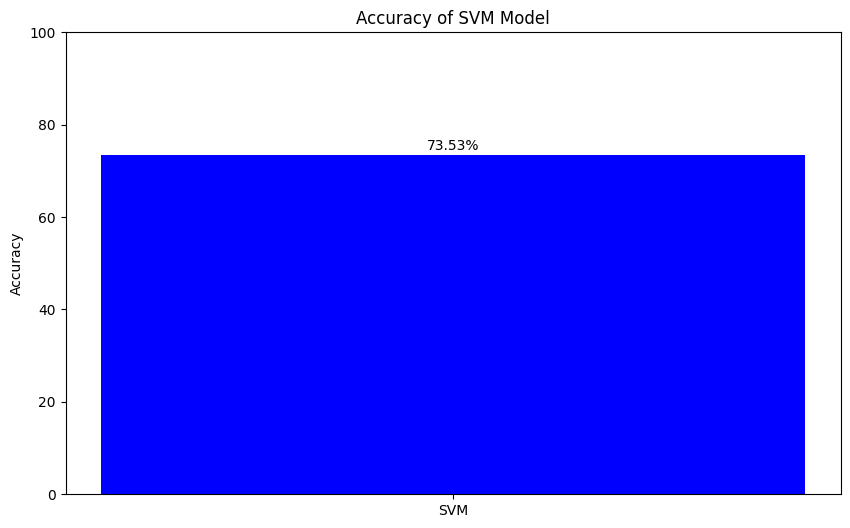

In [10]:
import matplotlib.pyplot as plt

# Accuracy data
accuracies = [73.527]
models = ['SVM']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue'])
plt.xlabel('')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for better visualization

# Display the accuracy values on top of the bars
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 1, f'{accuracies[i]:.2f}%', ha='center')

# Show the bar graph
plt.show()

        